In [49]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython


In [1]:
import pandas as pd

# Read in nutrition data from my Github to nutritionDF
# I changed some attributes such as "marital-status" to "maritalstatus"
# because hyphen's are reserved for subtraction in Python
nutritionDF  = pd.read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%204/nutrition_subset.csv");

nutritionDF

,fooditem,weightingrams,saturatedfat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [9]:
# Sort the values by saturated fat content, and show the top 5 results using head
nutritionDF.sort_values(by=['saturatedfat'], ascending=False).head(5)

# I think comparing foods of different sizes has very little validity because
# it could make larger foods seem worse than they are. A small food item would
# usually have less saturated at but it could have more per ounce

,fooditem,weightingrams,saturatedfat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [16]:
# Create saturated_fat_per_gram

# create the column by dividing satfat and weightingrams for each column
nutritionDF.apply(lambda row: row.saturatedfat / row.weightingrams, axis=1)

# put this column in the dataframe
nutritionDF['saturated_fat_per_gram'] = nutritionDF.apply(lambda row: row.saturatedfat / row.weightingrams, axis=1)

# Sort by satur saturated_fat_per_gram
nutritionDF.sort_values(by=['saturated_fat_per_gram'], ascending=False).head(5)

# Butter; salted 1 tbsp (908) has the highest saturated fat per gram

,fooditem,weightingrams,saturatedfat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


In [36]:
# Standardize the field saturated_fat_per_gram
from scipy import stats
import matplotlib.pyplot as plt

# nan_policy set to omit to get rid of ignore NaN values in the calculation
nutritionDF['scaled_sat_fat_per_gram'] = stats.zscore(nutritionDF.saturated_fat_per_gram, nan_policy='omit')

# Find outliers
nutritionOutliers = nutritionDF.query('(scaled_sat_fat_per_gram > 3 | scaled_sat_fat_per_gram < -3)')['scaled_sat_fat_per_gram']
nutritionOutliersHigh = nutritionDF.query('(scaled_sat_fat_per_gram > 3)')['scaled_sat_fat_per_gram']
nutritionOutliersLow = nutritionDF.query('(scaled_sat_fat_per_gram < -3)')['scaled_sat_fat_per_gram']

# List of high outliers
nutritionOutliersHigh.sort_values(ascending=False)


908    7.110475
909    7.110475
709    7.082741
710    7.082741
912    7.002408
913    7.002408
899    5.373078
890    5.371375
920    4.732985
210    4.240676
492    4.204266
576    3.942889
448    3.938687
898    3.278227
907    3.223726
Name: scaled_sat_fat_per_gram, dtype: float64

In [37]:
# Count low outliers
nutritionOutliersLow.count()

# There were no outliers at the low end of the scale

0

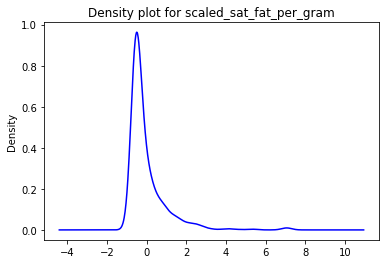

In [41]:
# Density plot for saturated_fat_per_gram
from scipy import stats
import matplotlib.pyplot as plt

# Create the plot
nutritionDF.scaled_sat_fat_per_gram.plot.density(color="blue")

#Title
plt.title('Density plot for scaled_sat_fat_per_gram')
plt.show()



In [47]:
# Addressing missing values
import numpy as np

# Load sklearn
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# For weightingrams, I chose mean as my imputing strategy
nutritionDF.weightingrams = imputer.fit_transform(nutritionDF['weightingrams'].values.reshape(-1,1))[:,0]

# For fooditem, I chose mode because this is a categorical attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
nutritionDF.fooditem = imputer.fit_transform(nutritionDF['fooditem'].values.reshape(-1,1))[:,0]

# For saturatedfat, cholesterol, and scaled saturated fat, I chose the median 
# because of how much values vary in size, this seemed most likely to be accurate or not skewed
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
nutritionDF.saturatedfat = imputer.fit_transform(nutritionDF['saturatedfat'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
nutritionDF.cholesterol = imputer.fit_transform(nutritionDF['cholesterol'].values.reshape(-1,1))[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
nutritionDF.saturated_fat_per_gram = imputer.fit_transform(nutritionDF['saturated_fat_per_gram'].values.reshape(-1,1))[:,0]


# Since the data had such a large range in sample sizes, I found it was better to use median,
# To avoid any skewing

In [101]:
# Standardize the field saturatedfat
from scipy import stats
import matplotlib.pyplot as plt

# nan_policy set to omit to get rid of ignore NaN values in the calculation
nutritionDF['scaledsaturatedfat'] = stats.zscore(nutritionDF.saturatedfat, nan_policy='omit')

# Find outliers
nutritionOutliers = nutritionDF.query('(scaledsaturatedfat > 3 | scaledsaturatedfat < -3)')['scaledsaturatedfat']

nutritionOutliers.size

# There are 20 outliers for saturated fat

20

In [102]:
# Standardize the field weightingrams
from scipy import stats
import matplotlib.pyplot as plt

# nan_policy set to omit to get rid of ignore NaN values in the calculation
nutritionDF['scaledweightingrams'] = stats.zscore(nutritionDF.weightingrams, nan_policy='omit')

# Find outliers
nutritionOutliers = nutritionDF.query('(scaledweightingrams > 3 | scaledweightingrams < -3)')['scaledweightingrams']

nutritionOutliers.size

# There are 22 outliers for weight in grams

22

In [104]:
# Standardize the field cholesterol
from scipy import stats
import matplotlib.pyplot as plt

# nan_policy set to omit to get rid of ignore NaN values in the calculation
nutritionDF['scaledcholesterol'] = stats.zscore(nutritionDF.cholesterol, nan_policy='omit')

# Find outliers
nutritionOutliers = nutritionDF.query('(scaledcholesterol > 3 | scaledcholesterol < -3)')['scaledcholesterol']

nutritionOutliers.size

# There are 17 outliers for cholesterol

17

In [50]:
# Load R, then read in the dataframe
%%R

library(readr)
nutritionDF <- read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%204/nutrition_subset.csv", show_col_types = FALSE)

summary(nutritionDF)

   fooditem         weightingrams     saturatedfat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  


In [55]:
# Sort by saturated fat
%%R

head(nutritionDF[order(nutritionDF$saturatedfat, decreasing=TRUE), 1:4], n=5)

# I think comparing foods of different sizes has very little validity because
# it could make larger foods seem worse than they are. A small food item would
# usually have less saturated at but it could have more per ounce


# A tibble: 5 × 4
  fooditem                              weightingrams saturatedfat cholesterol
  <chr>                                         <dbl>        <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE           1110        120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 GAL          1188        118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE           1108         92           609
4 CREME PIE                     1 PIE             910         90.1          46
5 LARD                          1 CUP             205         80.4         195


In [68]:
# Add saturated_fat_per_gram column
%%R

# Gives mutate function
library(dplyr)

# Input column
nutritionDF <- nutritionDF %>%
  mutate(saturated_fat_per_gram = saturatedfat / weightingrams)

head(nutritionDF[order(nutritionDF$saturated_fat_per_gram, decreasing=TRUE), 1:5])

# Butter; salted 1 tbsp (908) has the highest saturated fat per gram

# A tibble: 6 × 5
  fooditem               weightingrams saturatedfat cholesterol saturated_fat_p…
  <chr>                          <dbl>        <dbl>       <dbl>            <dbl>
1 BUTTER; SALTED       …            14          7.1          31            0.507
2 BUTTER; UNSALTED     …            14          7.1          31            0.507
3 BUTTER; SALTED       …           113         57.1         247            0.505
4 BUTTER; UNSALTED     …           113         57.1         247            0.505
5 BUTTER; SALTED       …             5          2.5          11            0.5  
6 BUTTER; UNSALTED     …             5          2.5          11            0.5  


In [82]:
# Standardize saturated_fat_per_gram
%%R

nutritionDF$scaled_sat_fat_per_gram <- scale(x = nutritionDF$saturated_fat_per_gram)

# Print to check that the mean is 0
# summary(nutritionDF$scaled_sat_fat_per_gram)

# Display all high values
highDF <- subset(nutritionDF, scaled_sat_fat_per_gram > 3)
highDF[order(highDF$saturated_fat_per_gram, decreasing=TRUE), 1:5]


# A tibble: 15 × 5
   fooditem              weightingrams saturatedfat cholesterol saturated_fat_p…
   <chr>                         <dbl>        <dbl>       <dbl>            <dbl>
 1 BUTTER; SALTED      …          14            7.1          31            0.507
 2 BUTTER; UNSALTED    …          14            7.1          31            0.507
 3 BUTTER; SALTED      …         113           57.1         247            0.505
 4 BUTTER; UNSALTED    …         113           57.1         247            0.505
 5 BUTTER; SALTED      …           5            2.5          11            0.5  
 6 BUTTER; UNSALTED    …           5            2.5          11            0.5  
 7 LARD                …          13            5.1          12            0.392
 8 LARD                …         205           80.4         195            0.392
 9 IMITATION CREAMERS; …           2            0.7           0            0.35 
10 CHOCOLATE; BITTER OT…          28.4          9             0            0.317
11 COCONU

In [91]:
# Count how many low values there are
%%R

lowDF <- subset(nutritionDF, scaled_sat_fat_per_gram < -3)
dim(lowDF)

# This shows that there are 0 low values

[1] 0 6


In [94]:
# Addressing missing values
%%R

# Load hmisc for imputing the values
install.packages("Hmisc")
library(Hmisc)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Hmisc_4.6-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 784633 bytes (766 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [117]:
%%R

# Same imputation choices from Python
nutritionDF$fooditem_imputed <- with(nutritionDF, impute(fooditem, most_frequent))

nutritionDF$weightingrams_imputed <- with(nutritionDF, impute(weightingrams, median))

nutritionDF$saturatedfat_imputed <- with(nutritionDF, impute(saturatedfat, median))

nutritionDF$cholesterol_imputed <- with(nutritionDF, impute(cholesterol, median))

nutritionDF$scaled_saturated_imputed <- with(nutritionDF, impute(scaled_sat_fat_per_gram, median))

In [123]:
# Standardize weightingrams
%%R

nutritionDF$scaled_weightingrams <- scale(x = nutritionDF$weightingrams)

# Determine the three sigma rule for the scaled_education attribute
three_sigma_rule <- (nutritionDF$scaled_weightingrams < -3 |
                     nutritionDF$scaled_weightingrams > 3)

# Count the outliers
cat("Total outliers:", sum(three_sigma_rule))

# Display the outliers
cat("\n\nA list of these outliers: \n")
nutritionDF$scaled_weightingrams[which(three_sigma_rule)]

Total outliers: 22

A list of these outliers: 
 [1] 4.323765 6.887585 5.460714 3.840561 3.567693 5.443659 7.882415 5.449344
 [9] 4.323765 5.108259 5.631256 3.925832 5.449344 5.199215 5.381127 5.904124
[17] 4.522731 4.522731 4.522731 4.522731 4.323765 7.916524


In [124]:
# Standardize saturatedfat
%%R

nutritionDF$scaled_saturatedfat <- scale(x = nutritionDF$saturatedfat)

# Determine the three sigma rule for the scaled_education attribute
three_sigma_rule <- (nutritionDF$scaled_saturatedfat < -3 |
                     nutritionDF$scaled_saturatedfat > 3)

# Count the outliers
cat("Total outliers:", sum(three_sigma_rule))

# Display the outliers
cat("\n\nA list of these outliers: \n")
nutritionDF$scaled_saturatedfat[which(three_sigma_rule)]

Total outliers: 20

A list of these outliers: 
 [1]  4.059096 10.788208  4.468613  4.803673  5.771622  4.077710  3.184218
 [8]  8.191497  6.264904  3.500663 10.639293  8.014660  4.729215  3.928795
[15]  4.943281  4.943281  7.111860  3.025996  3.277290  4.403463


In [125]:
# Standardize cholesterol
%%R

nutritionDF$scaled_cholesterol <- scale(x = nutritionDF$cholesterol)

# Determine the three sigma rule for the scaled_education attribute
three_sigma_rule <- (nutritionDF$scaled_cholesterol < -3 |
                     nutritionDF$scaled_cholesterol > 3)

# Count the outliers
cat("Total outliers:", sum(three_sigma_rule))

# Display the outliers
cat("\n\nA list of these outliers: \n")
nutritionDF$scaled_cholesterol[which(three_sigma_rule)]

Total outliers: 17

A list of these outliers: 
 [1]  3.146420  4.355150  8.148063  5.063716 16.842585  8.898309  4.471855
 [8]  4.330142  4.713601  9.590203  4.530208  5.188757  6.872644  4.805298
[15]  3.696601  5.030372  5.588889
